# 3D Maps

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import plotly.graph_objects as go# Start writing code here...

## Connect to Google Drive

In [2]:
# script to connect to personal google drive
!ls /datasets/drive

'01 Resume'			       Ideas.desktop
'02 Projects'			       P0201
'03 Desarrollo Técnico'		       PlayerasEstampadas
 Cartera			       ProjectTracker.desktop
'Colab Notebooks'		       Recursos
 Data				       ROSR781229HTSDLC05.pdf
 Diagrama_ER_Tshirts.drawio	       Templates
 flujo				       Untitled0.ipynb
'Hoja de cálculo sin título.desktop'


In [3]:
# load the file
surface1 = np.loadtxt('/datasets/drive/Data/SSMP-D2/battlefm_tm.asc',skiprows=6)

In [4]:
# explore the size of the file
surface1.shape

(341, 270)

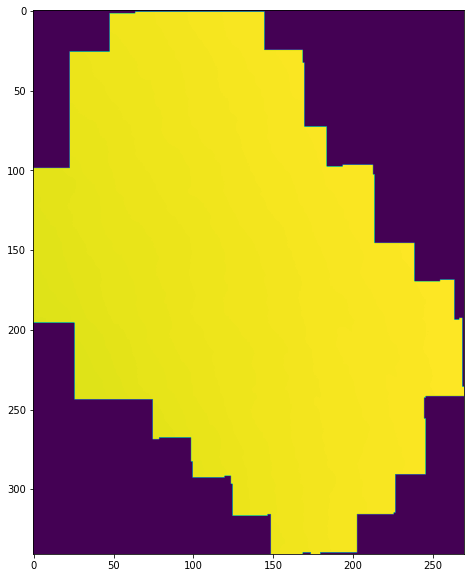

In [5]:
# plot the file
plt.figure(figsize=(10,10))
plt.imshow(surface1)

## Replace -9999 values

In [6]:
#locate the -9999 values into the file
np.where(surface1 == -9999)

(array([  0,   0,   0, ..., 340, 340, 340]),
 array([  0,   1,   2, ..., 267, 268, 269]))

In [7]:
# change the values using no.nan function
surface1[np.where(surface1 == -9999)] = np.nan

In [8]:
surface1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

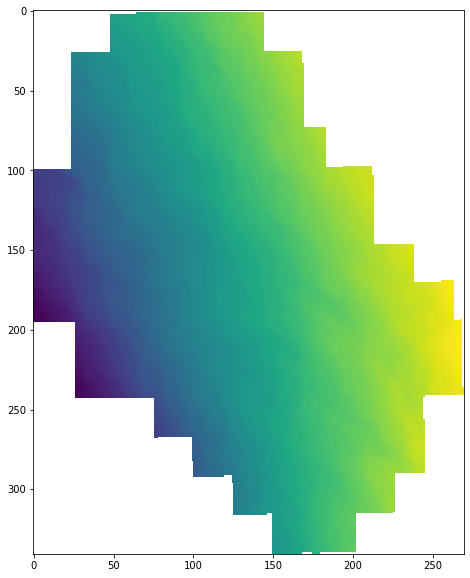

In [9]:
# plot the file without -9999 values
plt.figure(figsize=(10,10))
plt.imshow(surface1)

## Steps to load all ASCII files from Google Drive

In [10]:
# import the library glob
import glob
# create a variable
list_of_files = glob.glob('/datasets/drive/Data/SSMP-D2/*.asc')
# print the content of the variable
print(list_of_files)

['/datasets/drive/Data/SSMP-D2/paskapoofm_upper_slice_tm.asc', '/datasets/drive/Data/SSMP-D2/wapitifm_tm.asc', '/datasets/drive/Data/SSMP-D2/hsu_s1_tm.asc', '/datasets/drive/Data/SSMP-D2/paskapoofm_middle_slice_tm.asc', '/datasets/drive/Data/SSMP-D2/scollardfm_tm.asc', '/datasets/drive/Data/SSMP-D2/hsu_s2_tm.asc', '/datasets/drive/Data/SSMP-D2/leaparkfm_tm.asc', '/datasets/drive/Data/SSMP-D2/slice0_10_tm.asc', '/datasets/drive/Data/SSMP-D2/hsu_c1_tm.asc', '/datasets/drive/Data/SSMP-D2/battlefm_tm.asc', '/datasets/drive/Data/SSMP-D2/hsu_c2_tm.asc', '/datasets/drive/Data/SSMP-D2/paskapoofm_lower_slice_tm.asc']


## Create a contour map

In [11]:
# create a list of surfaces. List of files that contain surface data
data = []
for file_name in list_of_files:
    ascii_grid = np.loadtxt(file_name,skiprows=6)
    ascii_grid[np.where(ascii_grid == -9999)] = np.nan
    data.append(ascii_grid)

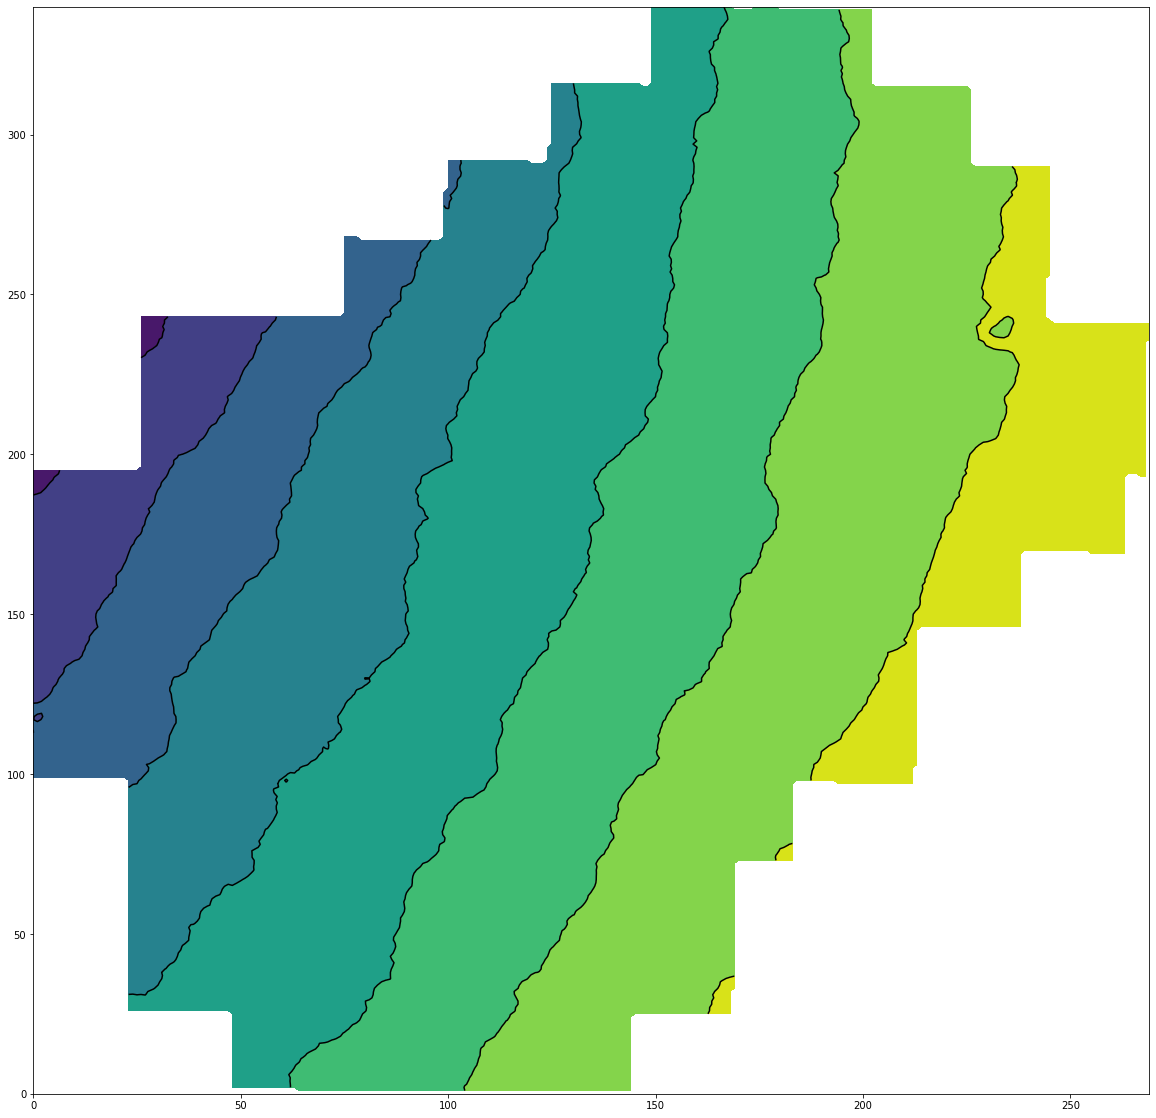

In [12]:
fig2 = plt.figure(figsize=(20,20))
plt.contour(data[1], colors='black')
plt.contourf(data[1])
plt.show()

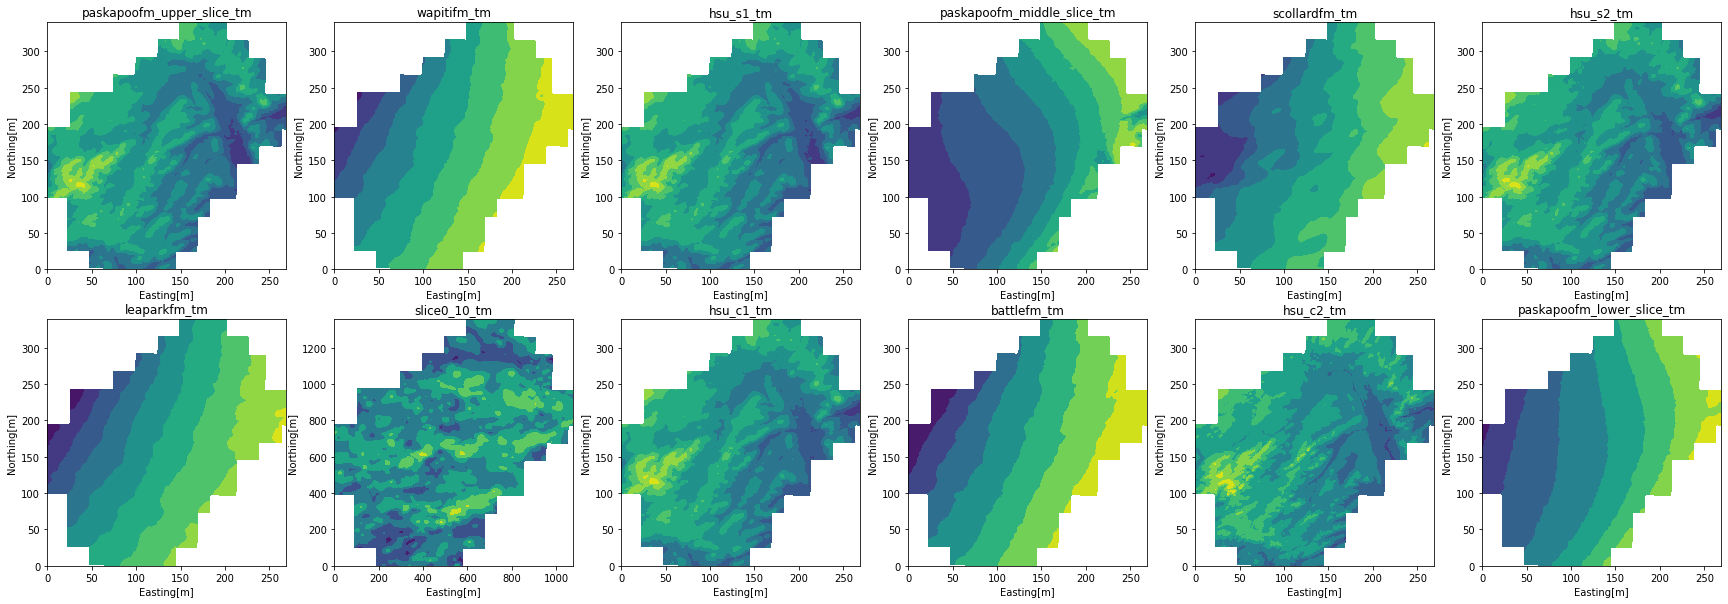

In [28]:
fig3, axs = plt.subplots(2,6,figsize=(30,10))
n = 0
for i in range(2):
    for j in range(6):
        axs[i,j].contourf(data[n])
        axs[i,j].set_xlabel('Easting[m]')
        axs[i,j].set_ylabel('Northing[m]')
        axs[i,j].set_title(list_of_files[n][29:-4])
        n+=1

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22e90012-8c1c-4fa6-bf22-3fab8d76a457' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>